# "Signal Processing with Julia Language- Part 3"
> "Basic Signal Functions"
- toc: true
- badges: true
- comments: true
- categories: [jupyter, SignalProcessing]

# Background Information 

##  Part 1

For background information, pls see [Signal Processing with Julia Language- Part I](https://gjunqueira-sys.github.io/J-J-Engineering-Blog/jupyter/signalprocessing/2021/12/27/SignalProcessingPart1.html)

In part 1 we discussed how to represent a signal, and constructor functions using my signal package in Julia.

My signal processing package can be found at [MySignalProcessing.jl](https://github.com/gjunqueira-sys/MySignalProcessing.jl)

##  Part 2

Basic Functions [Signal Processing with Julia Language- Part 2](https://gjunqueira-sys.github.io/J-J-Engineering-Blog/jupyter/signalprocessing/2021/12/31/SignalProcessingPart2.html)



In [1]:
## load Dependancies
using MySignalProcessing
using Plots


## Signal add

We can add two signals together. However, we need to make sure that the signals have the same length.
If sequences are of unequal lenghts or if the sample positions are different for equal-length sequences, the we cannot directly add.
We have to first augment x1(n) and x2(n) , so that they have the same position vector n (and hence the same length).

Furtunally, the `sigadd` function does all that for us.

In [2]:
s1 = impseq(-10, 10);
s2 = stepseq(-5, 15);

In [3]:
sigadd(s1, s2)

signal(Real[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], Real[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1  …  6, 7, 8, 9, 10, 11, 12, 13, 14, 15])

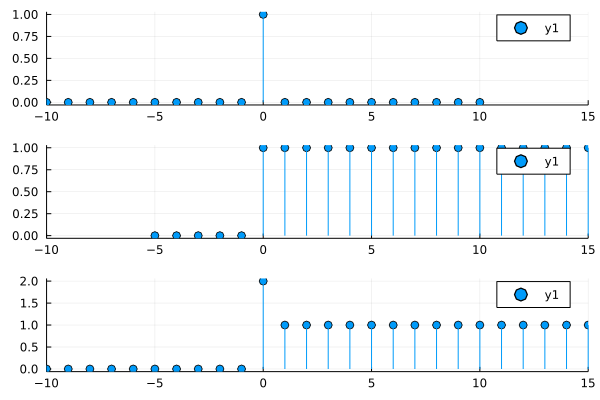

In [4]:
p1 = plot(s1.n, s1.A, line =:stem, marker=:o)
p2= plot(s2.n, s2.A, line =:stem, marker=:o)
p3 = plot(sigadd(s1, s2).n, sigadd(s1, s2).A, line =:stem, marker=:o)
plot(p1,p2,p3, layout=(3,1), xlims=(-10, 15))

`Julia ` language has a powerful multiple dispatch mechanism, which allows us to call a function based on the type of the arguments.
Therefore, we can easily extend the `Base.+` function to work with our signal package. This way, we can add two signals together :

`signal1 + signal2`

In [5]:
s₃ = s1 + s2 #Base.+ Operator extended to work with our package

signal(Real[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], Real[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1  …  6, 7, 8, 9, 10, 11, 12, 13, 14, 15])

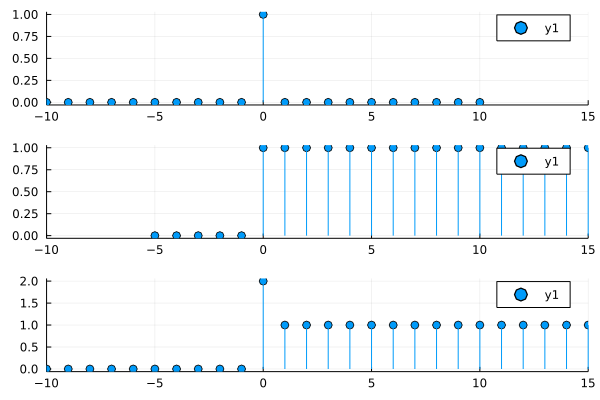

In [6]:
p1 = plot(s1.n, s1.A, line =:stem, marker=:o)
p2= plot(s2.n, s2.A, line =:stem, marker=:o)
p3 = plot(s₃.n, s₃.A, line =:stem, marker=:o)
plot(p1,p2,p3, layout=(3,1), xlims=(-10, 15))

## Signal Shift

Julia is known for the highly composable nature of its language. Meaning that functions can be composed of other functions and we
can use the output of one function as the input of another. This leads to a very powerful tool for signal processing.
Hopefully you are starting to see the elegance in which Julia is able to do this.





In [7]:
s = impseq(-10, 10);
sshifted = s |> sigshift(5) # |> is the pipe operator, piping the signal through a function and shifting it by 5 samples

signal(Real[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Real[-5, -4, -3, -2, -1, 0, 1, 2, 3, 4  …  6, 7, 8, 9, 10, 11, 12, 13, 14, 15])

The same thing could also be written as:

In [8]:
sigshift(5) ∘ s # this is the same as the above, however, we compose from right to left

MySignalProcessing.var"#1#2"{Int64}(5) ∘ signal(Real[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Real[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1  …  1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

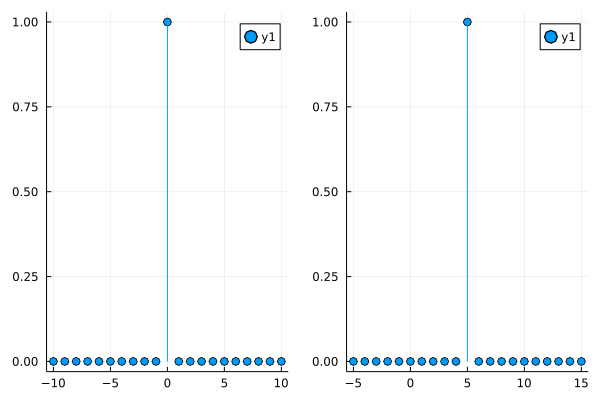

In [9]:
p1 = plot(s.n, s.A, line =:stem, marker=:o)
p2 = plot(sshifted.n, sshifted.A, line =:stem, marker=:o)
fig3 = plot(p1,p2, layout=(1,2))
display(fig3)

# Signal Multiply

In [10]:
s1 = stepseq(-10, 10) |> sigshift(-5);

s2 = signal(0.0, -15, 15);

s3 = sigadd(s1,s2);

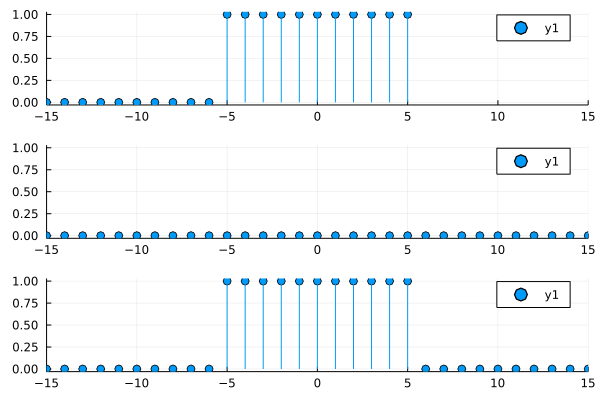

In [11]:
p1 = plot(s1.n, s1.A, line =:stem, marker=:o, xlims=(-15,15))
p2 = plot(s2.n, s2.A, line =:stem, marker=:o, xlims=(-15,15))
p3 = plot(s3.n, s3.A, line =:stem, marker=:o, xlims=(-15,15))
plot(p1,p2,p3, layout=(3,1))



In [12]:
s4 = signal(1.0, -15, 15);
s5 = signal(0.0, -15, 15);
s5.A = rand.().*s4.A;

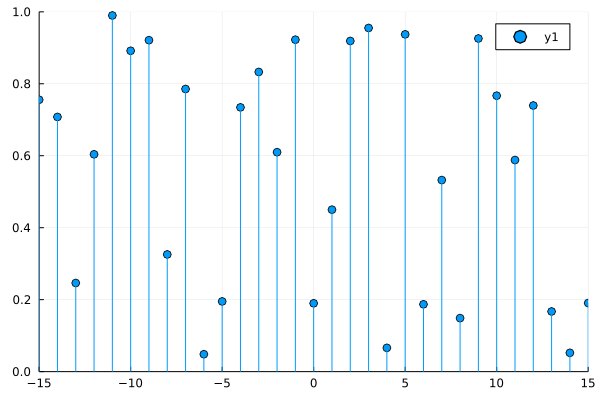

In [13]:
p5 = plot(s5.n, s5.A, line =:stem, marker=:o, xlims=(-15,15), ylims=(0,1))

Signal Multiplication:
Function to multiply two signal s1 and s2.
pls note that the signals must have the same length.
If sequences are of unequal lenghts or if the sample positions are  different for equal-length sequences, the we cannot directly add.
We have to first augment x1(n) and x2(n) , so that they have the same position vector n (and hence the same length).

The amplitude of the resulting signal is the product of the amplitudes of the two signals, element-wise.

In [14]:
s6 = sigmult(s5, s3)

signal(Real[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Real[-15, -14, -13, -12, -11, -10, -9, -8, -7, -6  …  6, 7, 8, 9, 10, 11, 12, 13, 14, 15])

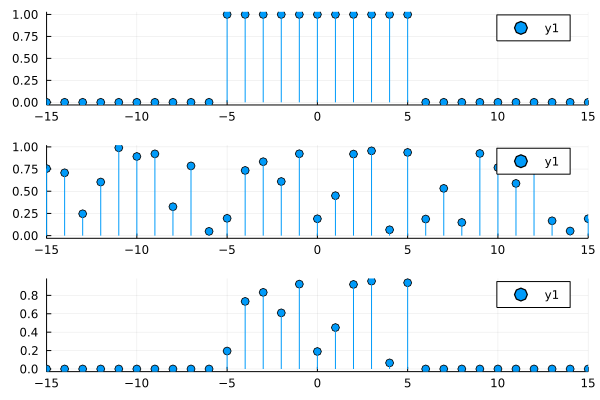

In [15]:
p1 = plot(s3.n, s3.A, line =:stem, marker=:o, xlims=(-15,15))
p2 = plot(s5.n, s5.A, line =:stem, marker=:o, xlims=(-15,15))
p3 = plot(s6.n, s6.A, line =:stem, marker=:o, xlims=(-15,15))
plot(p1,p2,p3, layout=(3,1))

Just like the signal add, we have also extended `Base.*` to work with our signal package:

In [16]:
s7 = s5 * s3

signal(Real[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Real[-15, -14, -13, -12, -11, -10, -9, -8, -7, -6  …  6, 7, 8, 9, 10, 11, 12, 13, 14, 15])

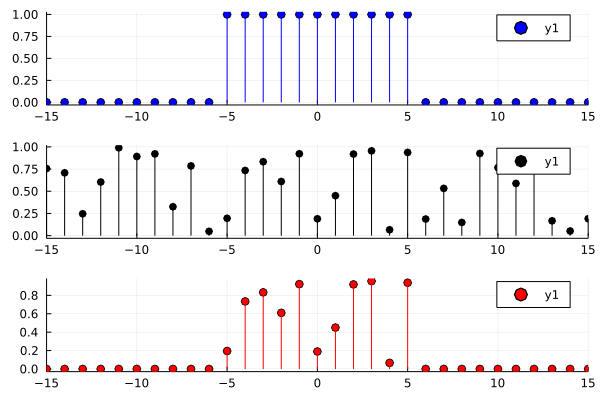

In [20]:
p1 = plot(s3.n, s3.A, line =:stem, marker=:o, xlims=(-15,15), color=:blue)
p2 = plot(s5.n, s5.A, line =:stem, marker=:o, xlims=(-15,15), color=:black)
p3 = plot(s7.n, s7.A, line =:stem, marker=:o, xlims=(-15,15), color=:red)
plot(p1,p2,p3, layout=(3,1))

With some very basic functions, we can already do some pretty interesting things.
Next post,  we will really build on these functions to get into applications and see how they can be used in signal processing.